#Business Diversification


---

Phase 1 project, November 2024

---

DSF-PT09 CLASS



## Overview


---

The company in concern, intends to diversify its business portfolio to purchasing and operating airplanes for commercial and private enterprises.

Due to the high capital investment required this project intends to determine the lowest risk aircraft, the company can purchase to start this new business endeavor.

The project, intends to translate the findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.


## Business Undestanding


---

### Objectives

1. Develop an accident risk frequency for the different aircraft makes and models from historical accident records
2. Develop an acquisition strategy based on potential risk portfolio for different make of aircraft
3. Evaluate and determine lowest  risk  aircraft for purchase for private and commercial enterprises


In [91]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [92]:
#importing the dataset
df=pd.read_csv('/content/AviationData.csv', encoding='latin-1', low_memory=False )

In [94]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [95]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


## Data Understanding


---

1. Extract the few first and last rows in the dataset to View content
2. View the  % of missing values per column and datatypes in the dataset
3. Do a statistical analysis for the numerical columns
4. View the size of the dataset
5. Visualize raw data

In [96]:
df.shape

(88889, 31)

In [97]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [99]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [100]:
df.isna().sum()

,0
Event.Id,0
Investigation.Type,0
Accident.Number,0
Event.Date,0
Location,52
Country,226
Latitude,54507
Longitude,54516
Airport.Code,38757
Airport.Name,36185


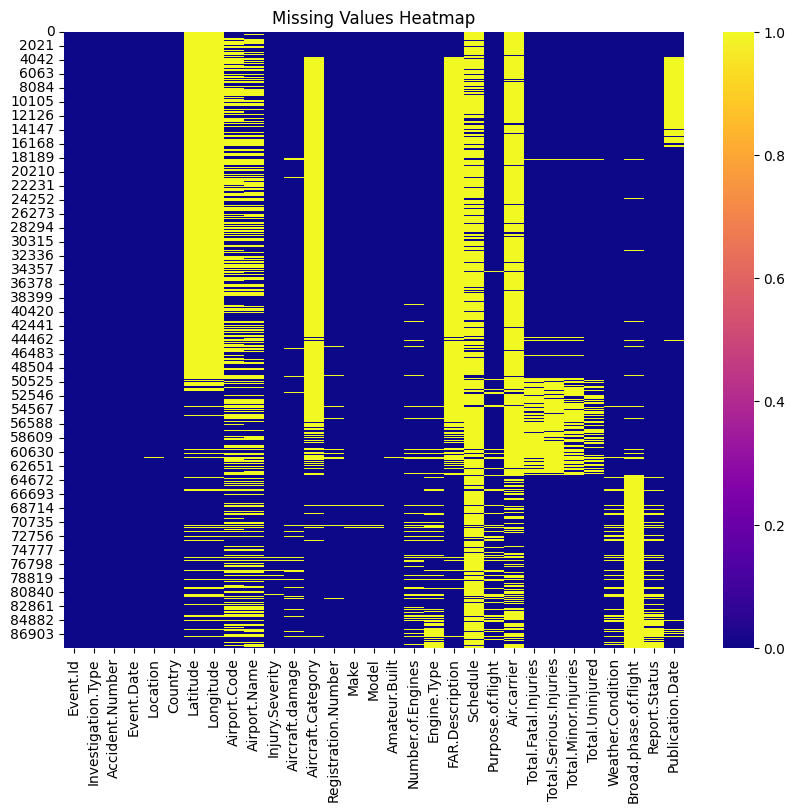

In [101]:
# Visualize the missing values
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=True, cmap="plasma")
plt.title("Missing Values Heatmap")
plt.show()

## Data Preparation


---

The data cleaning process will be as follows;
1. Drop columns with more than 70% missing values
2. Drop of all columns that are  not of immediate concern to the objective of low risk airplanes. For example
       
        *   Investigation.Type
        *   Registration.Number
        *   Publication.Date
        *   Airport.Code
        *   Airport.Name
2. Substitute the object type column with mode and float64 columns with mean
3. Remove fuzzy duplicates and aliases in Make, Model and Weather conditions column
4. Define the target market by country with the greatest % of available data
5. Import changes to CSV for onward processing in Tableau and visualization
6. As per the business problem a risk matrix best answers the hypothesis. In this case therefore;
      *   	Develop risk metrics
      *   Assign severity as per the string values provided in the dataset
      *   Aggregate the risk metrics
      *   Assign risk scores
      *   Develop a risk matrix
     







In [102]:
# Drop columns with more than 70% of missing data
df = df.dropna(axis=1, thresh=0.7 * df.shape[0])
print(df.columns)

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Injury.Severity', 'Aircraft.damage',
       'Registration.Number', 'Make', 'Model', 'Amateur.Built',
       'Number.of.Engines', 'Engine.Type', 'Purpose.of.flight',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Report.Status', 'Publication.Date'],
      dtype='object')


In [103]:
# Drop more columns
df = df.drop(columns=['Investigation.Type', 'Publication.Date', 'Registration.Number'])

In [104]:
#Dropping data before Year 1982. Too few details available in prior years
df= df[df['Event.Date'] >= '1982-01-01']

In [105]:
# As stated in the business problem, the only the area of interest is in airplanes for Business and Private purposes
# Therefore relevant rows = Business, Corporate, Charter, Air Taxi and  Commercial
df = df[df['Purpose.of.flight'].isin(['Business', 'Corporate', 'Charter', 'Air Taxi', 'Commercial'])]
print(df['Purpose.of.flight'].value_counts())

Purpose.of.flight
Business    4018
Name: count, dtype: int64


In [106]:
# create a new column called total incidents
# Which is sum of Total.Fatal.Injuries, Total.Serious.Injuries, Total.Minor.Injuries and Total.Uninjured
df['Total.Incidents'] = df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'] + df['Total.Uninjured']


In [107]:
# view if new column has been added
df.head()

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Total.Incidents
8,20020909X01561,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,Probable Cause,2.0
25,20020917X01905,DCA82AA008,1982-01-03,"ASHLAND, VA",United States,Fatal(8),Destroyed,Cessna,414A,No,2.0,Reciprocating,Business,8.0,0.0,0.0,0.0,IMC,Probable Cause,8.0
36,20020917X02410,MIA82FKA05,1982-01-04,SAINT CROIX,NaN,Fatal(1),Destroyed,Cessna,206,No,1.0,Reciprocating,Business,1.0,0.0,1.0,0.0,VMC,Probable Cause,2.0
37,20020917X02304,LAX82FUM06,1982-01-05,"RAMONA, CA",United States,Fatal(3),Destroyed,Navion,A,No,1.0,Reciprocating,Business,3.0,0.0,0.0,0.0,IMC,Probable Cause,3.0
40,20020917X01764,ATL82IA029,1982-01-05,"PENSACOLA, FL",United States,Incident,Minor,Rockwell,114,No,1.0,Reciprocating,Business,0.0,0.0,0.0,1.0,VMC,Probable Cause,1.0


In [108]:
# drop missing values in Aircraft.Damage column
df = df.dropna(subset=['Aircraft.damage'])

In [109]:
# View the data types and available entries
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3926 entries, 8 to 88867
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                3926 non-null   object 
 1   Accident.Number         3926 non-null   object 
 2   Event.Date              3926 non-null   object 
 3   Location                3925 non-null   object 
 4   Country                 3913 non-null   object 
 5   Injury.Severity         3925 non-null   object 
 6   Aircraft.damage         3926 non-null   object 
 7   Make                    3926 non-null   object 
 8   Model                   3924 non-null   object 
 9   Amateur.Built           3924 non-null   object 
 10  Number.of.Engines       3794 non-null   float64
 11  Engine.Type             3792 non-null   object 
 12  Purpose.of.flight       3926 non-null   object 
 13  Total.Fatal.Injuries    3598 non-null   float64
 14  Total.Serious.Injuries  3506 non-null   floa

In [110]:
# View missing values again
df.isna().sum()

,0
Event.Id,0
Accident.Number,0
Event.Date,0
Location,1
Country,13
Injury.Severity,1
Aircraft.damage,0
Make,0
Model,2
Amateur.Built,2


In [111]:
# Fill the missing values float64 columns(numeric) with their respective columns mean value
df.fillna(df.select_dtypes(include=['float64']).mean(), inplace=True)

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3757 entries, 8 to 88867
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                3757 non-null   object 
 1   Accident.Number         3757 non-null   object 
 2   Event.Date              3757 non-null   object 
 3   Location                3757 non-null   object 
 4   Country                 3757 non-null   object 
 5   Injury.Severity         3757 non-null   object 
 6   Aircraft.damage         3757 non-null   object 
 7   Make                    3757 non-null   object 
 8   Model                   3756 non-null   object 
 9   Amateur.Built           3757 non-null   object 
 10  Number.of.Engines       3757 non-null   float64
 11  Engine.Type             3678 non-null   object 
 12  Purpose.of.flight       3757 non-null   object 
 13  Total.Fatal.Injuries    3757 non-null   float64
 14  Total.Serious.Injuries  3757 non-null   floa

In [118]:
df = df.drop('Engine.Type', axis=1)

In [119]:
# Check duplicates
df.duplicated().sum()
# View duplicated data
df[df.duplicated()]
# Remove the duplicated data
df = df.drop_duplicates()

In [120]:
# Apply uniform casing to the dataset
df = df.apply(lambda col: col.str.upper() if col.dtype == 'object' else col)

In [121]:
# check the country with the more data to allow substansive analysis
df['Country'].value_counts()

,count
Country,
UNITED STATES,3756


In [122]:
# For analysis of the business problem, our target market will be the US because of the amount of available data
# Extract the US dataset
df = df[df['Country'].str.strip().eq('UNITED STATES')]

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3756 entries, 8 to 88867
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                3756 non-null   object 
 1   Accident.Number         3756 non-null   object 
 2   Event.Date              3756 non-null   object 
 3   Location                3756 non-null   object 
 4   Country                 3756 non-null   object 
 5   Injury.Severity         3756 non-null   object 
 6   Aircraft.damage         3756 non-null   object 
 7   Make                    3756 non-null   object 
 8   Model                   3755 non-null   object 
 9   Amateur.Built           3756 non-null   object 
 10  Number.of.Engines       3756 non-null   float64
 11  Purpose.of.flight       3756 non-null   object 
 12  Total.Fatal.Injuries    3756 non-null   float64
 13  Total.Serious.Injuries  3756 non-null   float64
 14  Total.Minor.Injuries    3756 non-null   floa

In [124]:
# save the copy of the target market for analysis and visualization in tableau
df.to_csv('target_market.csv', index=False)
from google.colab import files
files.download('target_market.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [126]:
#  A risk Matrix best answers the business problem in question for the phase 1 project
# Group the make and Model columns and specify  the function to apply to each risk column and regularize new column

risk_metrics = df.groupby(['Make', 'Model']).agg({
    'Aircraft.damage': lambda x: x[x.isin(['Substantial', 'Destroyed'])].value_counts().to_dict(),  # Frequency of damage categories
    'Total.Fatal.Injuries': 'mean',  # Average fatal injuries
    'Total.Serious.Injuries': 'mean',  # Average serious injuries
    'Total.Minor.Injuries': 'mean',  # Average minor injuries
    'Total.Uninjured': 'mean',  # Average uninjured
    'Total.Incidents': 'sum'  # Total incidents
}).reset_index()

print(risk_metrics)

# Reset index for readability
risk_metrics.reset_index(inplace=True)


                          Make         Model Aircraft.damage  \
0         AAA AIRCRAFT LEASING           192              {}   
1                        ADAMS          A60S              {}   
2          ADVANCED TECHNOLOGY  PREDATOR 480              {}   
3               AERO COMMANDER           100              {}   
4               AERO COMMANDER       100-180              {}   
...                        ...           ...             ...   
1288         WHEELER ACFT. CO.   EXPRESS 100              {}   
1289  WHEELER TECHNOLOGY, INC.        FT-210              {}   
1290                       WSK       PZL-104              {}   
1291            WSK PZL MIELEC          M-26              {}   
1292                    YUNEEC        YUNEEC              {}   

      Total.Fatal.Injuries  Total.Serious.Injuries  Total.Minor.Injuries  \
0                      2.0                0.232459              0.304249   
1                      0.0                1.000000              0.000000   
2  

In [127]:
# Map severity scores to 'Aircraft.damage'
severity_map = {'Substantial': 1, 'Destroyed': 2}
df['Damage.Score'] = df['Aircraft.damage'].map(severity_map)

# Calculate the severity frequency for each row
df['Severe.Damage.Frequency'] = df.groupby(['Make', 'Model'])['Damage.Score'].transform('sum')

# Convert damage scores to string format (optional, for clarity)
df['Damage.Score.String'] = df['Damage.Score'].astype(str)

print(df[['Make', 'Model', 'Aircraft.damage', 'Damage.Score', 'Severe.Damage.Frequency']])


                     Make       Model Aircraft.damage  Damage.Score  \
8                  CESSNA        401B     SUBSTANTIAL           NaN   
25                 CESSNA        414A       DESTROYED           NaN   
37                 NAVION           A       DESTROYED           NaN   
40               ROCKWELL         114           MINOR           NaN   
41                  PIPER   PA-24-250     SUBSTANTIAL           NaN   
...                   ...         ...             ...           ...   
88765               PIPER  PA46-500TP       DESTROYED           NaN   
88786           FAIRCHILD    SA227-AT     SUBSTANTIAL           NaN   
88804              CESSNA         207     SUBSTANTIAL           NaN   
88834         LEARJET INC          45     SUBSTANTIAL           NaN   
88867  AIRBUS HELICOPTERS   EC 130 T2     SUBSTANTIAL           NaN   

       Severe.Damage.Frequency  
8                          0.0  
25                         0.0  
37                         0.0  
40             

In [128]:
df.head()

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Total.Incidents,Damage.Score,Severe.Damage.Frequency,Damage.Score.String
8,20020909X01561,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",UNITED STATES,NON-FATAL,SUBSTANTIAL,CESSNA,401B,NO,...,0.0,0.0,0.0,2.0,IMC,PROBABLE CAUSE,2.0,NaN,0.0,nan
25,20020917X01905,DCA82AA008,1982-01-03,"ASHLAND, VA",UNITED STATES,FATAL(8),DESTROYED,CESSNA,414A,NO,...,8.0,0.0,0.0,0.0,IMC,PROBABLE CAUSE,8.0,NaN,0.0,nan
37,20020917X02304,LAX82FUM06,1982-01-05,"RAMONA, CA",UNITED STATES,FATAL(3),DESTROYED,NAVION,A,NO,...,3.0,0.0,0.0,0.0,IMC,PROBABLE CAUSE,3.0,NaN,0.0,nan
40,20020917X01764,ATL82IA029,1982-01-05,"PENSACOLA, FL",UNITED STATES,INCIDENT,MINOR,ROCKWELL,114,NO,...,0.0,0.0,0.0,1.0,VMC,PROBABLE CAUSE,1.0,NaN,0.0,nan
41,20020917X01993,FTW82DA037,1982-01-05,"LONOKE, AR",UNITED STATES,NON-FATAL,SUBSTANTIAL,PIPER,PA-24-250,NO,...,0.0,1.0,0.0,1.0,VMC,PROBABLE CAUSE,2.0,NaN,0.0,nan


In [129]:
# Function to calculate the severity of damage (sum of 'Destroyed' and 'Substantial' values)
def calculate_damage_severity(damage):
    if isinstance(damage, str):  # Ensure it's a string
        return damage.count('Destroyed') + damage.count('Substantial')
    return 0

# Apply the filter and calculation
df['Severe.Damage.Frequency'] = df['Aircraft.damage'].apply(calculate_damage_severity)

In [130]:
# Function to calculate the severity of damage
def calculate_damage_severity(damage):
    if isinstance(damage, str):  # Ensure it's a string
        return damage.count('Destroyed') + damage.count('Substantial')
    return 0

# Apply the calculation to create a new column for 'Severe.Damage.Frequency'
df['Severe.Damage.Frequency'] = df['Aircraft.damage'].apply(calculate_damage_severity)

In [131]:
df.head()

,Event.Id,Accident.Number,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Make,Model,Amateur.Built,...,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Report.Status,Total.Incidents,Damage.Score,Severe.Damage.Frequency,Damage.Score.String
8,20020909X01561,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",UNITED STATES,NON-FATAL,SUBSTANTIAL,CESSNA,401B,NO,...,0.0,0.0,0.0,2.0,IMC,PROBABLE CAUSE,2.0,NaN,0,nan
25,20020917X01905,DCA82AA008,1982-01-03,"ASHLAND, VA",UNITED STATES,FATAL(8),DESTROYED,CESSNA,414A,NO,...,8.0,0.0,0.0,0.0,IMC,PROBABLE CAUSE,8.0,NaN,0,nan
37,20020917X02304,LAX82FUM06,1982-01-05,"RAMONA, CA",UNITED STATES,FATAL(3),DESTROYED,NAVION,A,NO,...,3.0,0.0,0.0,0.0,IMC,PROBABLE CAUSE,3.0,NaN,0,nan
40,20020917X01764,ATL82IA029,1982-01-05,"PENSACOLA, FL",UNITED STATES,INCIDENT,MINOR,ROCKWELL,114,NO,...,0.0,0.0,0.0,1.0,VMC,PROBABLE CAUSE,1.0,NaN,0,nan
41,20020917X01993,FTW82DA037,1982-01-05,"LONOKE, AR",UNITED STATES,NON-FATAL,SUBSTANTIAL,PIPER,PA-24-250,NO,...,0.0,1.0,0.0,1.0,VMC,PROBABLE CAUSE,2.0,NaN,0,nan


In [132]:
# Aggregate risk metrics by Make and Model
aggregated_metrics = df.groupby(['Make', 'Model']).agg(
    Total_Incidents=('Event.Id', 'count'),
    Average_Fatal_Injuries=('Total.Fatal.Injuries', 'mean'),
    Average_Serious_Injuries=('Total.Serious.Injuries', 'mean'),
    Average_Minor_Injuries=('Total.Minor.Injuries', 'mean'),
    Severe_Damage_Frequency=('Severe.Damage.Frequency', 'sum')
).reset_index()

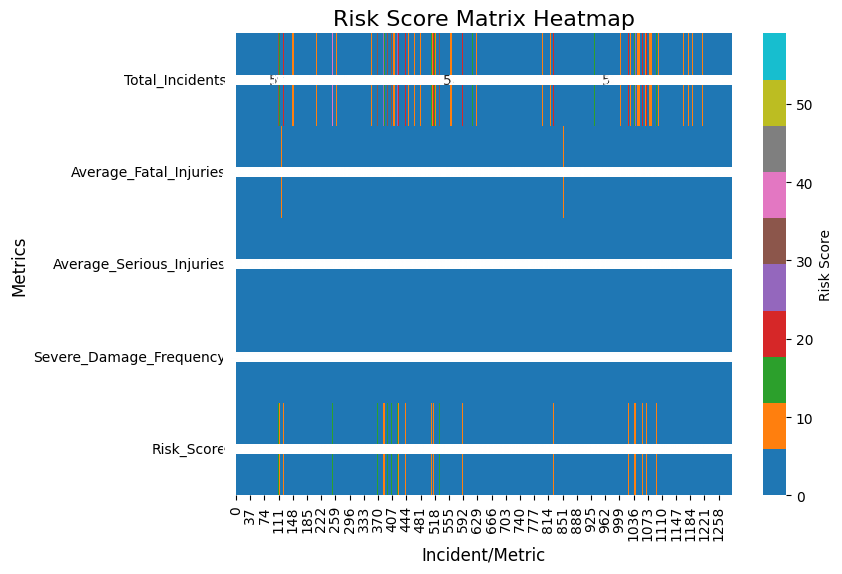

In [142]:
# Define weights for the risk score components
weights = {
    'Total_Incidents': 0.4,
    'Average_Fatal_Injuries': 0.3,
    'Average_Serious_Injuries': 0.2,
    'Severe_Damage_Frequency': 0.1
}

# Calculate Risk Score
aggregated_metrics['Risk_Score'] = (
    weights['Total_Incidents'] * aggregated_metrics['Total_Incidents'] +
    weights['Average_Fatal_Injuries'] * aggregated_metrics['Average_Fatal_Injuries'].fillna(0) +
    weights['Average_Serious_Injuries'] * aggregated_metrics['Average_Serious_Injuries'].fillna(0) +
    weights['Severe_Damage_Frequency'] * aggregated_metrics['Severe_Damage_Frequency']
)

# Classifying the risk based on the calculated Risk Score
def classify_risk(score):
    if score <= 1:
        return 'Low Risk'
    elif score <= 2:
        return 'Medium Risk'
    else:
        return 'High Risk'

aggregated_metrics['Risk_Category'] = aggregated_metrics['Risk_Score'].apply(classify_risk)

# Plotting the Risk Matrix Heatmap
plt.figure(figsize=(8, 6))

# Creating the heatmap for metrics and Risk Score
sns.heatmap(aggregated_metrics[['Total_Incidents', 'Average_Fatal_Injuries',
                                'Average_Serious_Injuries', 'Severe_Damage_Frequency', 'Risk_Score']].T,
            annot=True, cmap='tab10', fmt='.2f', cbar_kws={'label': 'Risk Score'})

# Adding titles and labels
plt.title("Risk Score Matrix Heatmap", fontsize=16)
plt.xlabel("Incident/Metric", fontsize=12)
plt.ylabel("Metrics", fontsize=12)

plt.show()





In [143]:
# Sort by Risk Score in ascending order to identify low-risk aircraft
low_risk_aircraft = aggregated_metrics.sort_values(by='Risk_Score', ascending=True)

# Display the top 10 low-risk aircraft
low_risk_aircraft.head()

# create a new dataframe fro aggregated numerics
df_metrics = aggregated_metrics.copy()

In [144]:
df_metrics.head()

,Make,Model,Total_Incidents,Average_Fatal_Injuries,Average_Serious_Injuries,Average_Minor_Injuries,Severe_Damage_Frequency,Risk_Score,Risk_Category
0,AAA AIRCRAFT LEASING,192,1,2.0,0.232459,0.304249,0,1.046492,Medium Risk
1,ADAMS,A60S,1,0.0,1.000000,0.000000,0,0.600000,Low Risk
2,ADVANCED TECHNOLOGY,PREDATOR 480,1,0.0,0.000000,1.000000,0,0.400000,Low Risk
3,AERO COMMANDER,100,3,0.0,0.333333,0.666667,0,1.266667,Medium Risk
4,AERO COMMANDER,100-180,1,3.0,0.000000,0.000000,0,1.300000,Medium Risk


## Data Visualization

---



In [145]:
df_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1293 entries, 0 to 1292
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Make                      1293 non-null   object 
 1   Model                     1293 non-null   object 
 2   Total_Incidents           1293 non-null   int64  
 3   Average_Fatal_Injuries    1293 non-null   float64
 4   Average_Serious_Injuries  1293 non-null   float64
 5   Average_Minor_Injuries    1293 non-null   float64
 6   Severe_Damage_Frequency   1293 non-null   int64  
 7   Risk_Score                1293 non-null   float64
 8   Risk_Category             1293 non-null   object 
dtypes: float64(4), int64(2), object(3)
memory usage: 91.0+ KB


In [138]:
# Defining the weights
weights = {
    'Total_Incidents': 0.4,
    'Average_Fatal_Injuries': 0.3,
    'Average_Serious_Injuries': 0.2,
    'Severe_Damage_Frequency': 0.1
}

# Calculating the Risk Score
aggregated_metrics['Risk_Score'] = (
    weights['Total_Incidents'] * aggregated_metrics['Total_Incidents'] +
    weights['Average_Fatal_Injuries'] * aggregated_metrics['Average_Fatal_Injuries'].fillna(0) +
    weights['Average_Serious_Injuries'] * aggregated_metrics['Average_Serious_Injuries'].fillna(0) +
    weights['Severe_Damage_Frequency'] * aggregated_metrics['Severe_Damage_Frequency']
)

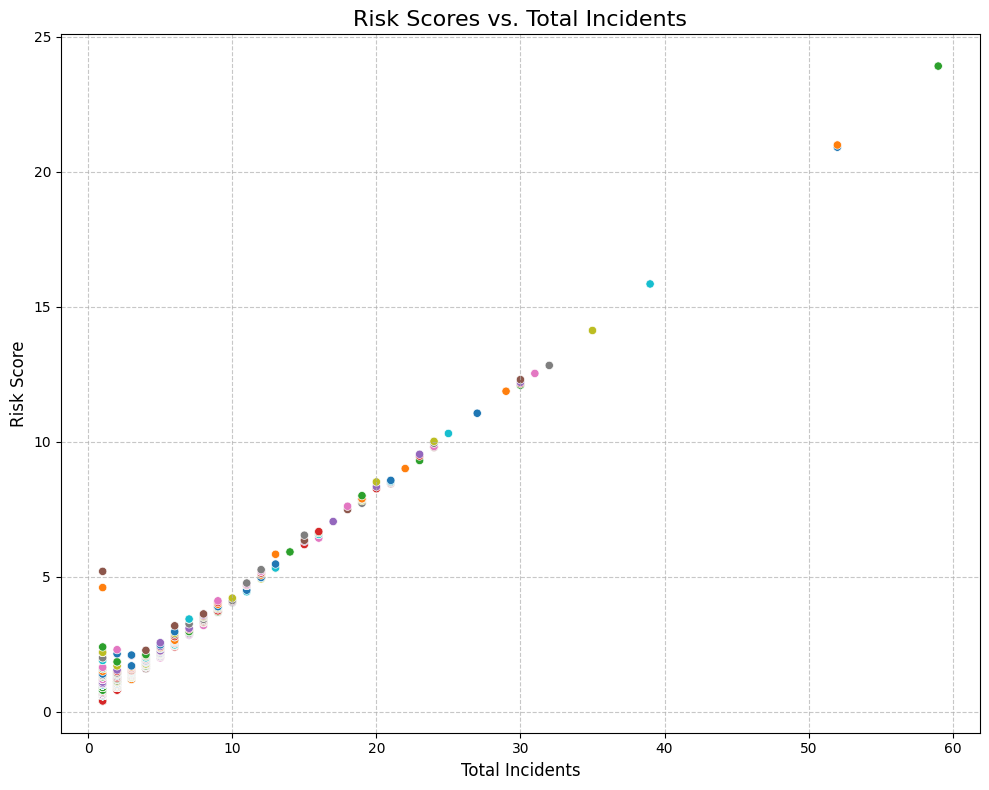

In [139]:
#
low_risk_aircraft['Make_Model'] = low_risk_aircraft['Make'] + " " + low_risk_aircraft['Model']

# Create a figure with specific size
plt.figure(figsize=(10, 8))

# Create the scatter plot using seaborn
sns.scatterplot(
    data=low_risk_aircraft,
    x='Total_Incidents',
    y='Risk_Score',
    hue='Make_Model',
    palette='tab10',
    legend=False
)

# Title and labels with customized font sizes
plt.title('Risk Scores vs. Total Incidents', fontsize=16)
plt.xlabel('Total Incidents', fontsize=12)
plt.ylabel('Risk Score', fontsize=12)

# Add gridlines for better readability
plt.grid(linestyle='--', alpha=0.7)

# Ensure everything fits within the plot
plt.tight_layout()

# Show the plot
plt.show()

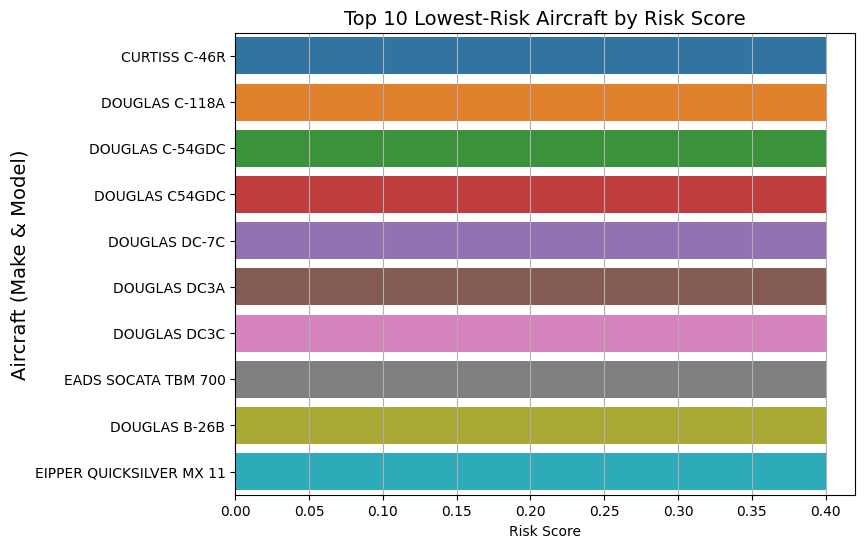

In [140]:
# combine the make and aircraft model data in to one column
low_risk_aircraft['Make_Model'] = low_risk_aircraft['Make'] + " " + low_risk_aircraft['Model']

# View the top 10 lowest risk aircraft
top_low_risk = low_risk_aircraft.head(10)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_low_risk,
    x='Risk_Score',
    y='Make_Model',
    hue='Make_Model',
    palette='tab10',
    order=top_low_risk.sort_values('Risk_Score')['Make_Model']
)
plt.title('Top 10 Lowest-Risk Aircraft by Risk Score', fontsize=14)
plt.xlabel('Risk Score', fontsize=10)
plt.ylabel('Aircraft (Make & Model)', fontsize=14)
plt.grid(axis='x', linestyle='-')
plt.show()

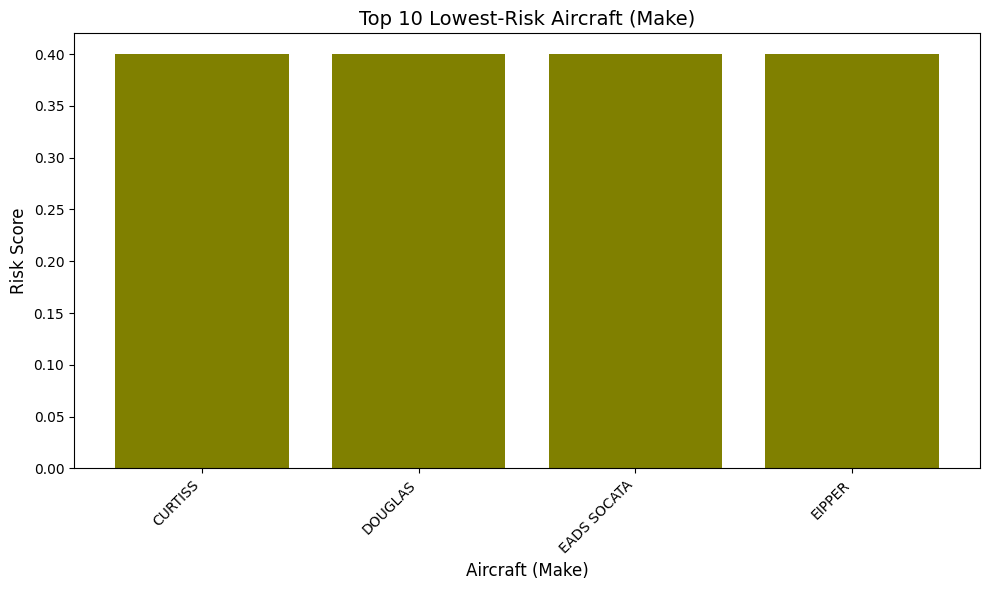

Acquisition Strategy:
Make: CURTISS, Risk Score: 0.40
Make: DOUGLAS, Risk Score: 0.40
Make: DOUGLAS, Risk Score: 0.40
Make: DOUGLAS, Risk Score: 0.40
Make: DOUGLAS, Risk Score: 0.40
Make: DOUGLAS, Risk Score: 0.40
Make: DOUGLAS, Risk Score: 0.40
Make: EADS SOCATA, Risk Score: 0.40
Make: DOUGLAS, Risk Score: 0.40
Make: EIPPER, Risk Score: 0.40


In [141]:
# Sort aircraft by Risk Score in ascending order
lowest_risk_aircraft = aggregated_metrics[['Make', 'Risk_Score']].sort_values(by='Risk_Score', ascending=True)

# Select top 5 lowest-risk models
top_low_risk_aircraft = lowest_risk_aircraft.head(10)

# Plot the Risk Score for the top 5 lowest-risk aircraft
plt.figure(figsize=(10, 6))
plt.bar(
    top_low_risk_aircraft['Make'],
    top_low_risk_aircraft['Risk_Score'],
    color='olive'
)
plt.xlabel('Aircraft (Make)', fontsize=12)
plt.ylabel('Risk Score', fontsize=12)
plt.title('Top 10 Lowest-Risk Aircraft (Make)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

# Display acquisition strategy
print("Acquisition Strategy:")
for index, row in top_low_risk_aircraft.iterrows():
    print(f"Make: {row['Make']}, Risk Score: {row['Risk_Score']:.2f}")


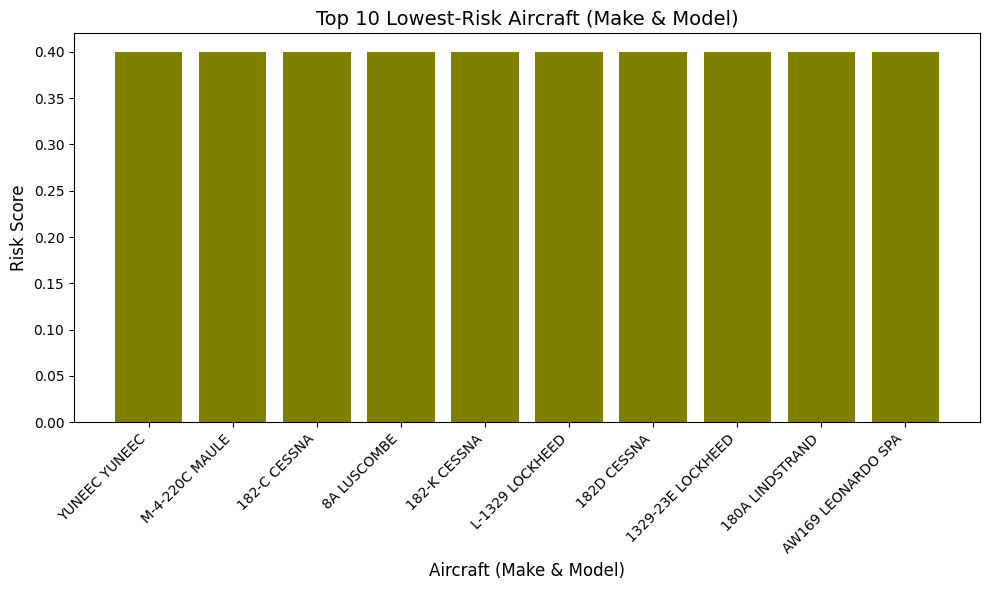

Acquisition Strategy:
Make: YUNEEC,'Model': YUNEEC, Risk Score: 0.40
Make: MAULE,'Model': M-4-220C, Risk Score: 0.40
Make: CESSNA,'Model': 182-C, Risk Score: 0.40
Make: LUSCOMBE,'Model': 8A, Risk Score: 0.40
Make: CESSNA,'Model': 182-K, Risk Score: 0.40
Make: LOCKHEED,'Model': L-1329, Risk Score: 0.40
Make: CESSNA,'Model': 182D, Risk Score: 0.40
Make: LOCKHEED,'Model': 1329-23E, Risk Score: 0.40
Make: LINDSTRAND,'Model': 180A, Risk Score: 0.40
Make: LEONARDO SPA,'Model': AW169, Risk Score: 0.40


In [ ]:
# Sort aircraft by Risk Score in ascending order
lowest_risk_aircraft = aggregated_metrics[['Make','Model', 'Risk_Score']].sort_values(by='Risk_Score', ascending=True)

# Select top 5 lowest-risk models
top_low_risk_aircraft = lowest_risk_aircraft.head(10)

# Plot the Risk Score for the top 5 lowest-risk aircraft
plt.figure(figsize=(10, 6))
plt.bar(
    top_low_risk_aircraft['Model'] + ' ' + top_low_risk_aircraft['Make'],
    top_low_risk_aircraft['Risk_Score'],
    color='olive'
)
plt.xlabel('Aircraft (Make & Model)', fontsize=12)
plt.ylabel('Risk Score', fontsize=12)
plt.title('Top 10 Lowest-Risk Aircraft (Make & Model)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

# Display acquisition strategy
print("Acquisition Strategy:")
for index, row in top_low_risk_aircraft.iterrows():
    print(f"Make: {row['Make']},'Model': {row['Model']}, Risk Score: {row['Risk_Score']:.2f}")

### Conclusion


---



The data provided could not explicitly give a dependable metrics to evaluate low risk aircraft. However, hypothethically Risk score was used to develop the acquisition matrix for the business problem stated.

The following Aircraft models are the lowest risk in ascending order;
Acquisition Strategy:

    1. Make: YUNEEC, Model: YUNEEC, Risk Score: 0.40
    2. Make: MAULE, Model: M-4-220C, Risk Score: 0.40
    3. Make: CESSNA, Model: 182-C, Risk Score: 0.40
    4. Make: LUSCOMBE, Model: 8A, Risk Score: 0.40
    5. Make: CESSNA, Model: 182-K, Risk Score: 0.40
    6. Make: LOCKHEED, Model: L-1329, Risk Score: 0.40
    7. Make: CESSNA, Model: 182D, Risk Score: 0.40
    8. Make: LOCKHEED, Model: 1329-23E, Risk Score: 0.40
    9. Make: LINDSTRAND, Model: 180A, Risk Score: 0.40
    10. Make: LEONARDO SPA, Model: AW169, Risk Score: 0.40

### Recommendations


---


As per the observations made from the data set given. Recommendations are as follows;

1. The company should source for  Continuously updated comprehensive risk data to evaluate aircraft makes/models based on current safety trends, accident reports, and recent proven technological advancements. The data set provided  for analysis should ghave data can be used to develop cost efficiency and Valuatio, and projected profitability.

2. Align acquisition decisions with the company's risk appetite and operational needs. For exampl while private users might prioritize safety commercial operators may balance safety with operational efficiency and cost

3. Upon acquisition the company should employ a fleet management strategy to evaluate emerging risks.

4. Risk Mitigationshould be carried out for both private and commercial purchases, aircraft that offer advanced safety technologies

5. Aircraft with higher risk scores are financially prohibitive for the startup company because of higher insurance premiums. Considerin the eterprise in question is a startup the full financial impact should be assessed when determining which aircraft to purchase to ensure profitability


In [ ]:
df.to_csv('cleaned_data.csv', index=False)
from google.colab import files
files.download('cleaned_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>